<a href="https://colab.research.google.com/github/DeepanjanSaha-INDIA/Neural_Network_MNIST_Dataset/blob/master/Digits_classifier_CNN_TF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dependencies

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

%matplotlib inline
tf.__version__

'2.2.0-rc2'

# Loading dataset

In [2]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Dataset Preprocessing

### Image normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Reshaping the dataset

In [0]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Building Convolutional Neural Network

## Defining model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 1]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [18]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9662
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9925
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0148 - sparse_categorical_accuracy: 0.9951


# Manual Testing

(28, 28)


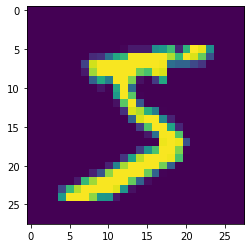

In [19]:
a = X_train[0,:,:,0]
print(a.shape)
plt.imshow(a)

In [20]:
model.predict(np.array([X_train[0,:,:,:]]))

array([[3.6742517e-10, 1.1920917e-12, 3.1088616e-13, 6.6536688e-04,
        1.9050462e-14, 9.9933380e-01, 1.7120476e-08, 1.2953084e-10,
        9.4008300e-08, 7.2706467e-07]], dtype=float32)

### Model evaluation and prediction

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0248 - sparse_categorical_accuracy: 0.9935


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9934999942779541


# Saving the model

In [0]:
model.save("digits_trained_CNN.h5")